# "Regression Analysis"
> "전북대학교 통계학 입문"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Introduction to Statistics]
- image: images/20211130linear.png

In [101]:
library(tidyverse)

# 기울기와 상관관계 추론

## Example 5.2

In [74]:
file_url =  "http://www.lock5stat.com/datasets2e/InkjetPrinters.csv"

In [17]:
inkjet = read.csv(file_url)
inkjet

Model,PPM,PhotoTime,Price,CostBW,CostColor
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>
HP Photosmart Pro 8500A e-All-in-One,3.9,67,300,1.6,7.2
Canon Pixma MX882,2.9,63,199,5.2,13.4
Lexmark Impact S305,2.7,43,79,6.9,9.0
Lexmark Interpret S405,2.9,42,129,4.9,13.9
Epson Workforce 520,2.4,170,70,4.9,14.4
Brother MFC-J6910DW,4.1,143,348,1.7,7.9
HP Officejet 7500A Wide Format e-All-in-One,3.4,66,299,2.7,9.1
Canon Pixma iX7000 Inkjet Business Printer,2.8,66,248,4.1,9.8
Kodak ESP Office 2170 All-in-One Printer,3.0,42,150,3.7,11.3


In [19]:
fit = lm(Price ~ PPM, data = inkjet)
summary(fit)


Call:
lm(formula = Price ~ PPM, data = inkjet)

Residuals:
   Min     1Q Median     3Q    Max 
-79.38 -51.40  -3.49  43.85  87.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -94.22      56.40  -1.671 0.112086    
PPM            90.88      19.49   4.663 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58.55 on 18 degrees of freedom
Multiple R-squared:  0.5471,	Adjusted R-squared:  0.522 
F-statistic: 21.75 on 1 and 18 DF,  p-value: 0.0001934


- $b_1 = 90.88, SE = 19.49$

In [25]:
t_df = count(inkjet) %>% as.numeric - 2
t_df

[1] 18

자유도가 18인 t-분포에서 $t^*=2.10$이므로 95% 신뢰구간은

$b_1 \pm t^* \centerdot SE$

In [32]:
90.88 - 2.10 * 19.49
90.88 + 2.10 * 19.49

[1] 49.951

[1] 131.809

이 데이터로부터 기울기(인쇄 속도가 분당 1페이지 더 빨라질 때 프린터 가격 상승)는 **49.95에서 131.81 사이라고 95% 확신한다.**

## Example 5.3

In [33]:
file_url = "http://www.lock5stat.com/datasets2e/RestaurantTips.csv"

In [35]:
RestaurantTips = read.csv(file_url)
head(RestaurantTips)

,Bill,Tip,Credit,Guests,Day,Server,PctTip
,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>
1,23.70,10.00,n,2,f,A,42.2
2,36.11,7.00,n,3,f,B,19.4
3,31.99,5.01,y,2,f,A,15.7
4,17.39,3.61,y,2,f,B,20.8
5,15.41,3.00,n,2,f,B,19.5
6,18.62,2.50,n,2,f,A,13.4


In [37]:
fit = lm(Tip ~ Bill, data= RestaurantTips)
summary(fit)


Call:
lm(formula = Tip ~ Bill, data = RestaurantTips)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3911 -0.4891 -0.1108  0.2839  5.9738 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.292267   0.166160  -1.759   0.0806 .  
Bill         0.182215   0.006451  28.247   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9795 on 155 degrees of freedom
Multiple R-squared:  0.8373,	Adjusted R-squared:  0.8363 
F-statistic: 797.9 on 1 and 155 DF,  p-value: < 2.2e-16


In [57]:
b1 = 0.182
SE = 0.006451
n = count(RestaurantTips) %>% as.numeric
df = n - 2
df

[1] 155

$t^* = 1.655$

90% 신뢰구간은 다음과 같다.

In [51]:
b1-1.655*SE
b1+1.655*SE

[1] 0.1713236

[1] 0.1926764

## Example 5.4

In [54]:
fit = lm(PctTip ~ Bill, data = RestaurantTips)
summary(fit)


Call:
lm(formula = PctTip ~ Bill, data = RestaurantTips)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9927 -2.3096 -0.6455  1.4679 25.5335 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.50965    0.73956   20.97   <2e-16 ***
Bill         0.04881    0.02871    1.70   0.0911 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.36 on 155 degrees of freedom
Multiple R-squared:  0.01831,	Adjusted R-squared:  0.01197 
F-statistic:  2.89 on 1 and 155 DF,  p-value: 0.09112


# 상관관계 t-검증

## Example 5.5

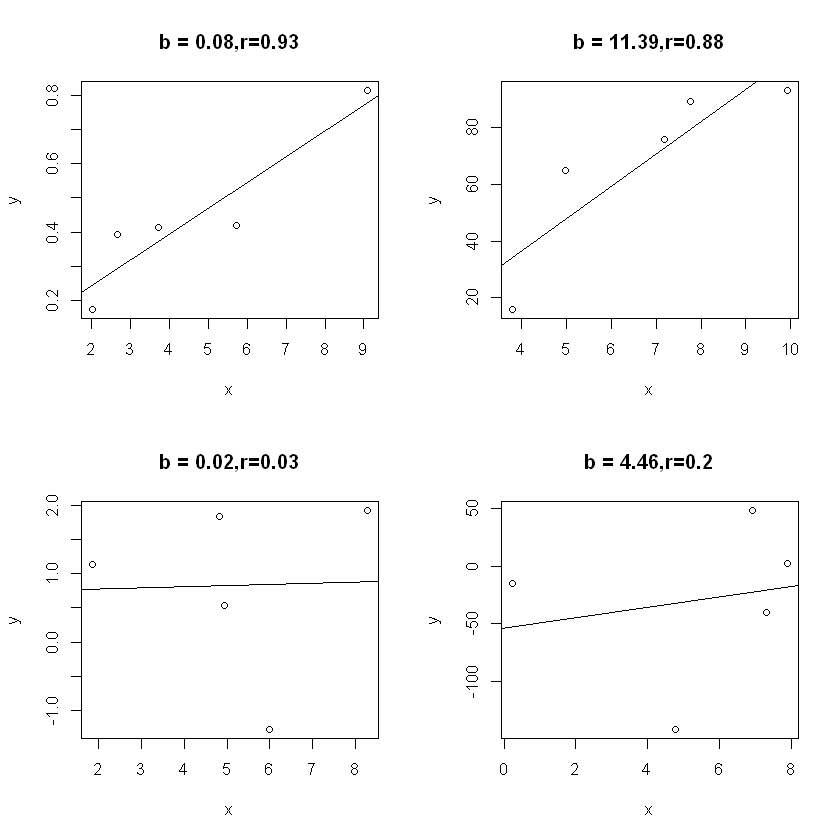

In [123]:
par(mfrow = c(2,2))
scatter_plot = function(n, beta, sd){
    x = runif(n, 0, 10)
    y = beta*x + rnorm(n, 0, sd)
    
    fit = lm(y~x)
    b = round(fit$coefficients[2],2)
    r = round(cor(x,y),2)
    
    
    
    plot(x, y, main = paste0("b = ",b,",r=",r))
    abline(fit)
}

set.seed(1)
scatter_plot(5,0.1,0.1)
scatter_plot(5, 10, 10)
scatter_plot(5, 0.2, 2)
scatter_plot(5, 1, 100)

# 결정계수

## Example 5.7

In [2]:
file_url =  "http://www.lock5stat.com/datasets2e/InkjetPrinters.csv"

In [3]:
inkjet = read.csv(file_url)
inkjet

Model,PPM,PhotoTime,Price,CostBW,CostColor
<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>
HP Photosmart Pro 8500A e-All-in-One,3.9,67,300,1.6,7.2
Canon Pixma MX882,2.9,63,199,5.2,13.4
Lexmark Impact S305,2.7,43,79,6.9,9.0
Lexmark Interpret S405,2.9,42,129,4.9,13.9
Epson Workforce 520,2.4,170,70,4.9,14.4
Brother MFC-J6910DW,4.1,143,348,1.7,7.9
HP Officejet 7500A Wide Format e-All-in-One,3.4,66,299,2.7,9.1
Canon Pixma iX7000 Inkjet Business Printer,2.8,66,248,4.1,9.8
Kodak ESP Office 2170 All-in-One Printer,3.0,42,150,3.7,11.3


In [83]:
corrn = cor(inkjet$Price, inkjet$PPM)

In [85]:
corrn = cor(inkjet$PPM, inkjet$Price)

In [86]:
corrn^2

[1] 0.5471356

$r = 0.7397$이므로 결정계수 $R^2 = (0.7397)^2 = 0.547$

In [87]:
summary(lm(Price~PPM, data=inkjet))


Call:
lm(formula = Price ~ PPM, data = inkjet)

Residuals:
   Min     1Q Median     3Q    Max 
-79.38 -51.40  -3.49  43.85  87.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -94.22      56.40  -1.671 0.112086    
PPM            90.88      19.49   4.663 0.000193 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58.55 on 18 degrees of freedom
Multiple R-squared:  0.5471,	Adjusted R-squared:  0.522 
F-statistic: 21.75 on 1 and 18 DF,  p-value: 0.0001934


## Example 5.9

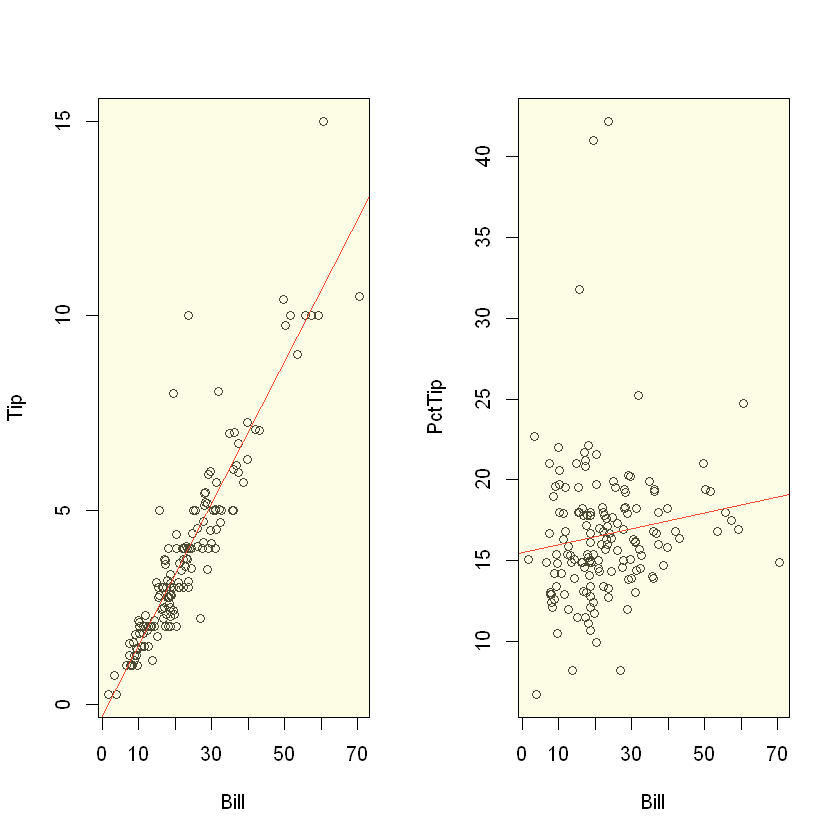

In [97]:
file_url <- "http://www.lock5stat.com/datasets2e/RestaurantTips.csv"
RestaurantTips <- read.csv(file_url)
par(mfrow=c(1,2))
plot(RestaurantTips$Tip~ RestaurantTips$Bill,xlab="Bill", ylab="Tip")
abline(lm(Tip~Bill, data=RestaurantTips ), col = "Red")
rect(par("usr")[1], par("usr")[3], par("usr")[2], par("usr")[4], col = adjustcolor("#faf6aa", alpha.f = 0.3))
plot(RestaurantTips$PctTip ~ RestaurantTips$Bill, xlab = "Bill", ylab = "PctTip")
abline(lm(PctTip~Bill,data=RestaurantTips), col="Red")
rect(par("usr")[1], par("usr")[3], par("usr")[2], par("usr")[4], col = adjustcolor("#faf6aa", alpha.f = 0.3))

## Problem 5.1

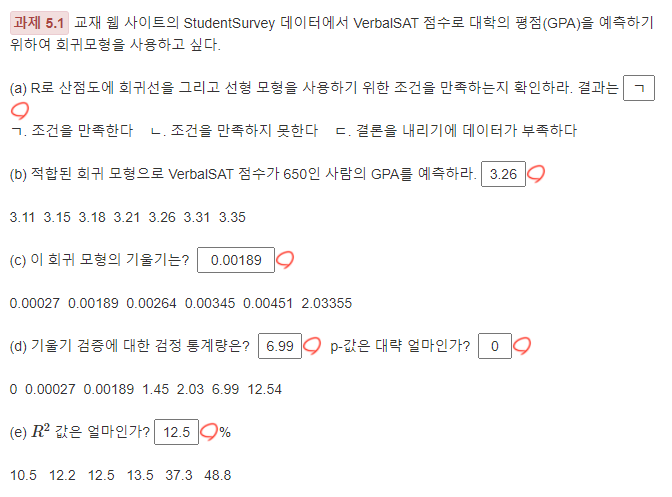

In [104]:
file_url="https://www.lock5stat.com/datasets2e/StudentSurvey.csv"
StudentSurvey = read.csv(file_url)
head(StudentSurvey)

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,Senior,M,No,Olympic,Math,10,1,71,180,4,4,540,670,1210,3.13,54,0
2,Sophomore,F,Yes,Academy,Math,4,7,66,120,2,2,520,630,1150,2.50,66,3
3,FirstYear,M,No,Nobel,Math,14,5,72,208,2,1,550,560,1110,2.55,130,0
4,Junior,M,No,Nobel,Math,3,1,63,110,1,1,490,630,1120,3.10,78,0
5,Sophomore,F,No,Nobel,Verbal,3,3,65,150,1,1,720,450,1170,2.70,40,6
6,Sophomore,F,No,Nobel,Verbal,5,4,65,114,2,2,600,550,1150,3.20,80,4



Call:
lm(formula = GPA ~ VerbalSAT, data = StudentSurvey)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0936 -0.2422  0.0282  0.2550  0.9253 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.0335506  0.1621397  12.542  < 2e-16 ***
VerbalSAT   0.0018929  0.0002709   6.989 1.45e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3732 on 343 degrees of freedom
  (17 observations deleted due to missingness)
Multiple R-squared:  0.1246,	Adjusted R-squared:  0.1221 
F-statistic: 48.84 on 1 and 343 DF,  p-value: 1.454e-11


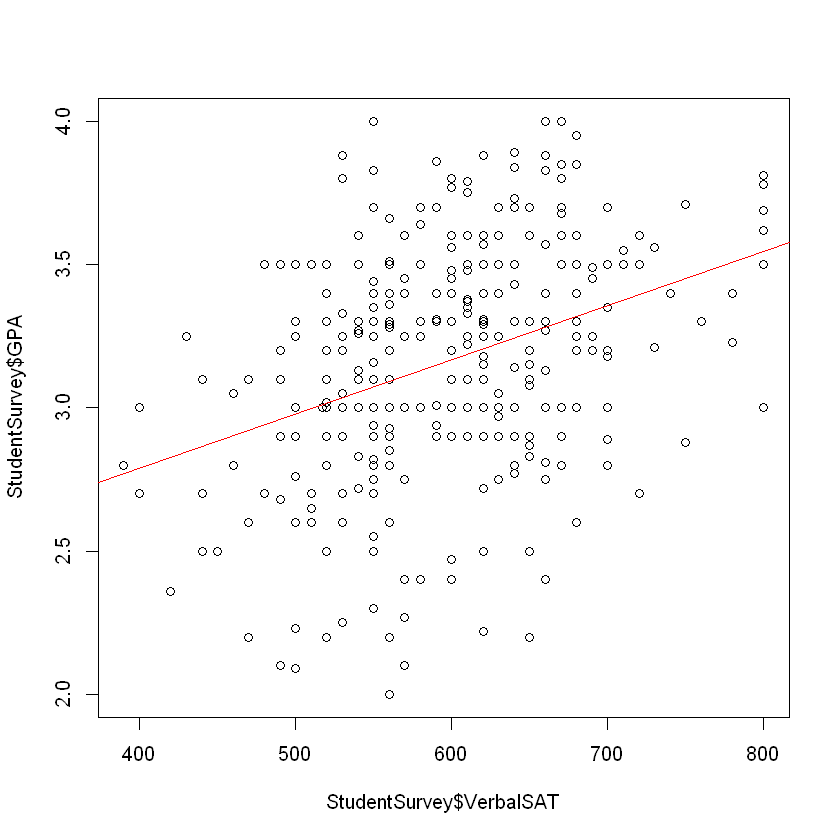

In [157]:
plot(StudentSurvey$GPA ~ StudentSurvey$VerbalSAT)
abline(lm(GPA~VerbalSAT, data = StudentSurvey), col="red")
summary(lm(GPA~VerbalSAT, data=StudentSurvey))

- p-값이 매우 작으므로 선형 모형을 사용하기 위한 조건을 만족한다.

- 전반적인 증가 추세를 나타내고, 뚜렷한 곡선이나 심각한 이상점이 없고, 회귀선 위와 아래에 비교적 균일한 점의 분포를 보여준다. 

In [116]:
0.0018929 * 650  + 2.0335506

[1] 3.263936

- 적합된 회귀 모형에서 VerbalSAT점수가 540인 사람의 GPA는 3.26으로 예측된다.

In [184]:
corrn = cor.test(StudentSurvey$GPA, StudentSurvey$VerbalSAT)
corrn


	Pearson's product-moment correlation

data:  StudentSurvey$GPA and StudentSurvey$VerbalSAT
t = 6.9886, df = 343, p-value = 1.454e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2570427 0.4421537
sample estimates:
      cor 
0.3530485 


In [182]:
0.3530485^2

[1] 0.1246432

## Problem 5.2

In [153]:
file_url="https://www.lock5stat.com/datasets2e/FacebookFriends.csv"
FacebookFriends = read.csv(file_url)
head(FacebookFriends)

,GMdensity,FBfriends
,<dbl>,<int>
1,-1.8,23
2,0.1,35
3,-1.2,80
4,-0.4,110
5,-0.9,120
6,-2.1,140


In [154]:
sdd=FacebookFriends$GMdensity %>%sd

In [155]:
FacebookFriends %>% filter(!abs(GMdensity)<=2*sdd)

GMdensity,FBfriends
<dbl>,<int>
-2.1,140


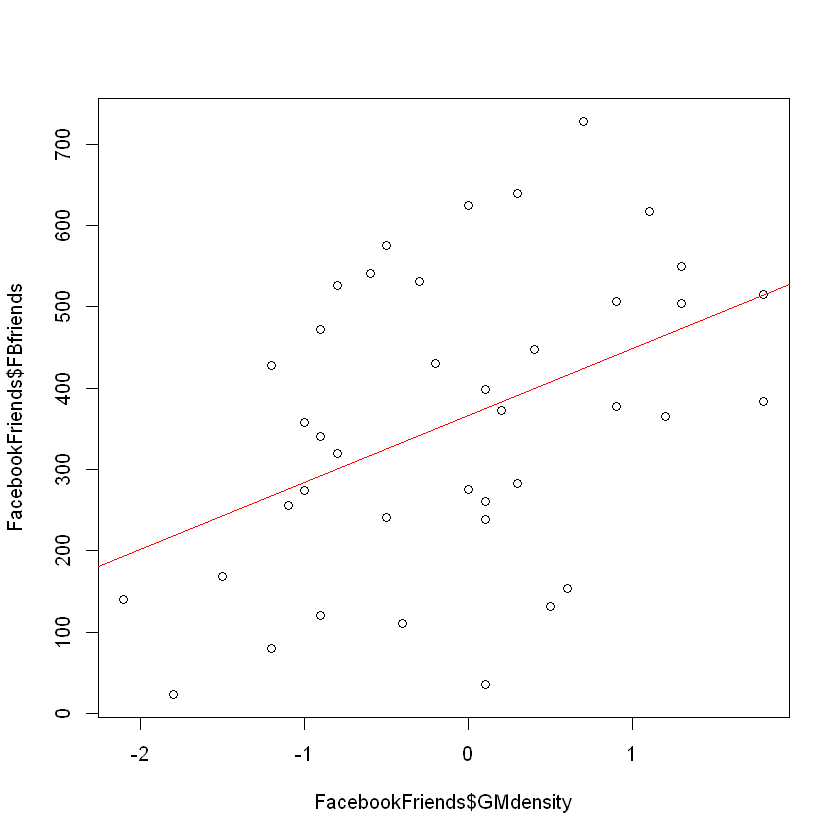

In [169]:
plot(FacebookFriends$FBfriends ~ FacebookFriends$GMdensity)

abline(lm(FBfriends ~ GMdensity, data=FacebookFriends), col="red")

- 선형 모형을 사용하기 위한 조건이 충족된다.

In [188]:
summary(lm(FBfriends ~ GMdensity, data=FacebookFriends))


Call:
lm(formula = FBfriends ~ GMdensity, data = FacebookFriends)

Residuals:
    Min      1Q  Median      3Q     Max 
-339.89 -110.01   -5.12   99.80  303.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   366.64      26.35  13.916  < 2e-16 ***
GMdensity      82.45      27.58   2.989  0.00488 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 165.7 on 38 degrees of freedom
Multiple R-squared:  0.1904,	Adjusted R-squared:  0.1691 
F-statistic: 8.936 on 1 and 38 DF,  p-value: 0.004882


In [189]:
cor.test(FacebookFriends$FBfriends, FacebookFriends$GMdensity)


	Pearson's product-moment correlation

data:  FacebookFriends$FBfriends and FacebookFriends$GMdensity
t = 2.9893, df = 38, p-value = 0.004882
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1444616 0.6583589
sample estimates:
      cor 
0.4363354 


In [187]:
0.4363354*sqrt(40-2) / sqrt(1-0.4363354^2)

[1] 2.989331


	Pearson's product-moment correlation

data:  FacebookFriends$FBfriends and FacebookFriends$GMdensity
t = 2.9893, df = 38, p-value = 0.004882
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1444616 0.6583589
sample estimates:
      cor 
0.4363354 



Call:
lm(formula = FBfriends ~ GMdensity, data = FacebookFriends)

Residuals:
    Min      1Q  Median      3Q     Max 
-339.89 -110.01   -5.12   99.80  303.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   366.64      26.35  13.916  < 2e-16 ***
GMdensity      82.45      27.58   2.989  0.00488 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 165.7 on 38 degrees of freedom
Multiple R-squared:  0.1904,	Adjusted R-squared:  0.1691 
F-statistic: 8.936 on 1 and 38 DF,  p-value: 0.004882


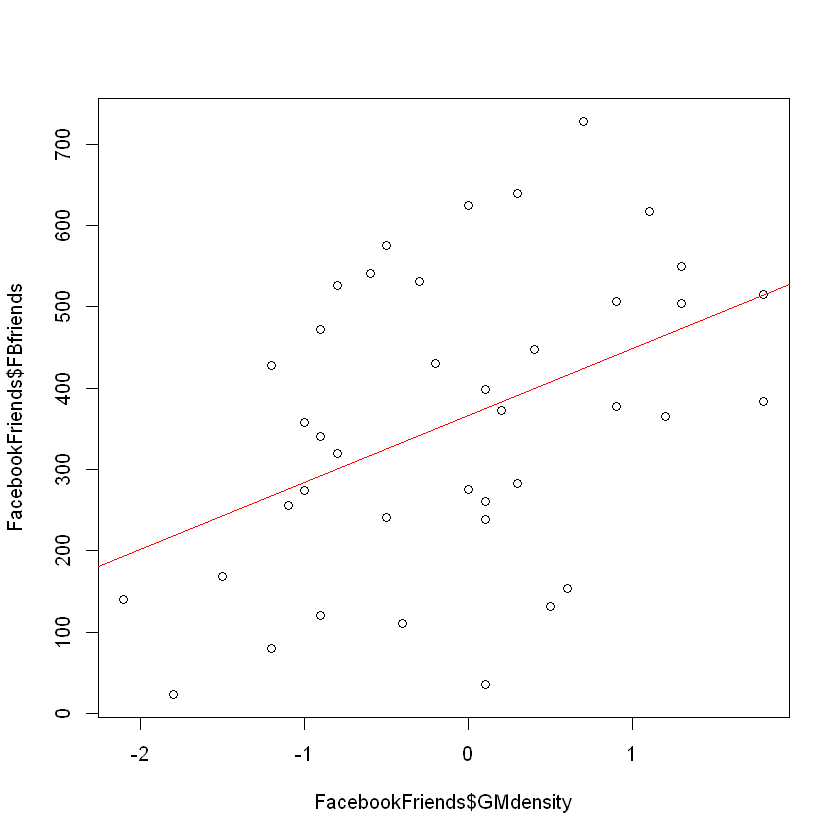

In [190]:
file_url <- "http://www.lock5stat.com/datasets2e/FacebookFriends.csv"

FacebookFriends <- read.csv(file_url)


plot(FacebookFriends$FBfriends ~ FacebookFriends$GMdensity)

abline(lm(FBfriends ~ GMdensity, data=FacebookFriends), col="red")

cor.test(FacebookFriends$FBfriends, FacebookFriends$GMdensity)

summary(lm(FBfriends ~ GMdensity, data=FacebookFriends))

In [192]:
0.436^2

[1] 0.190096

In [193]:
0.79 %>%sqrt

[1] 0.8888194

In [5]:
cor.test(inkjet$PPM, inkjet$Price)


	Pearson's product-moment correlation

data:  inkjet$PPM and inkjet$Price
t = 4.6634, df = 18, p-value = 0.0001934
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4417677 0.8906678
sample estimates:
      cor 
0.7396862 
